In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
file_path = "/content/diabetes.csv"

df =pd.read_csv(file_path)

In [27]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


We can see the **target** is **Outcome** and its OneHot Encoded



Here,we can see there are no missing values

In [13]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [35]:
features = df.columns[:-1]

Here, we will use pair plots to for visual analysis

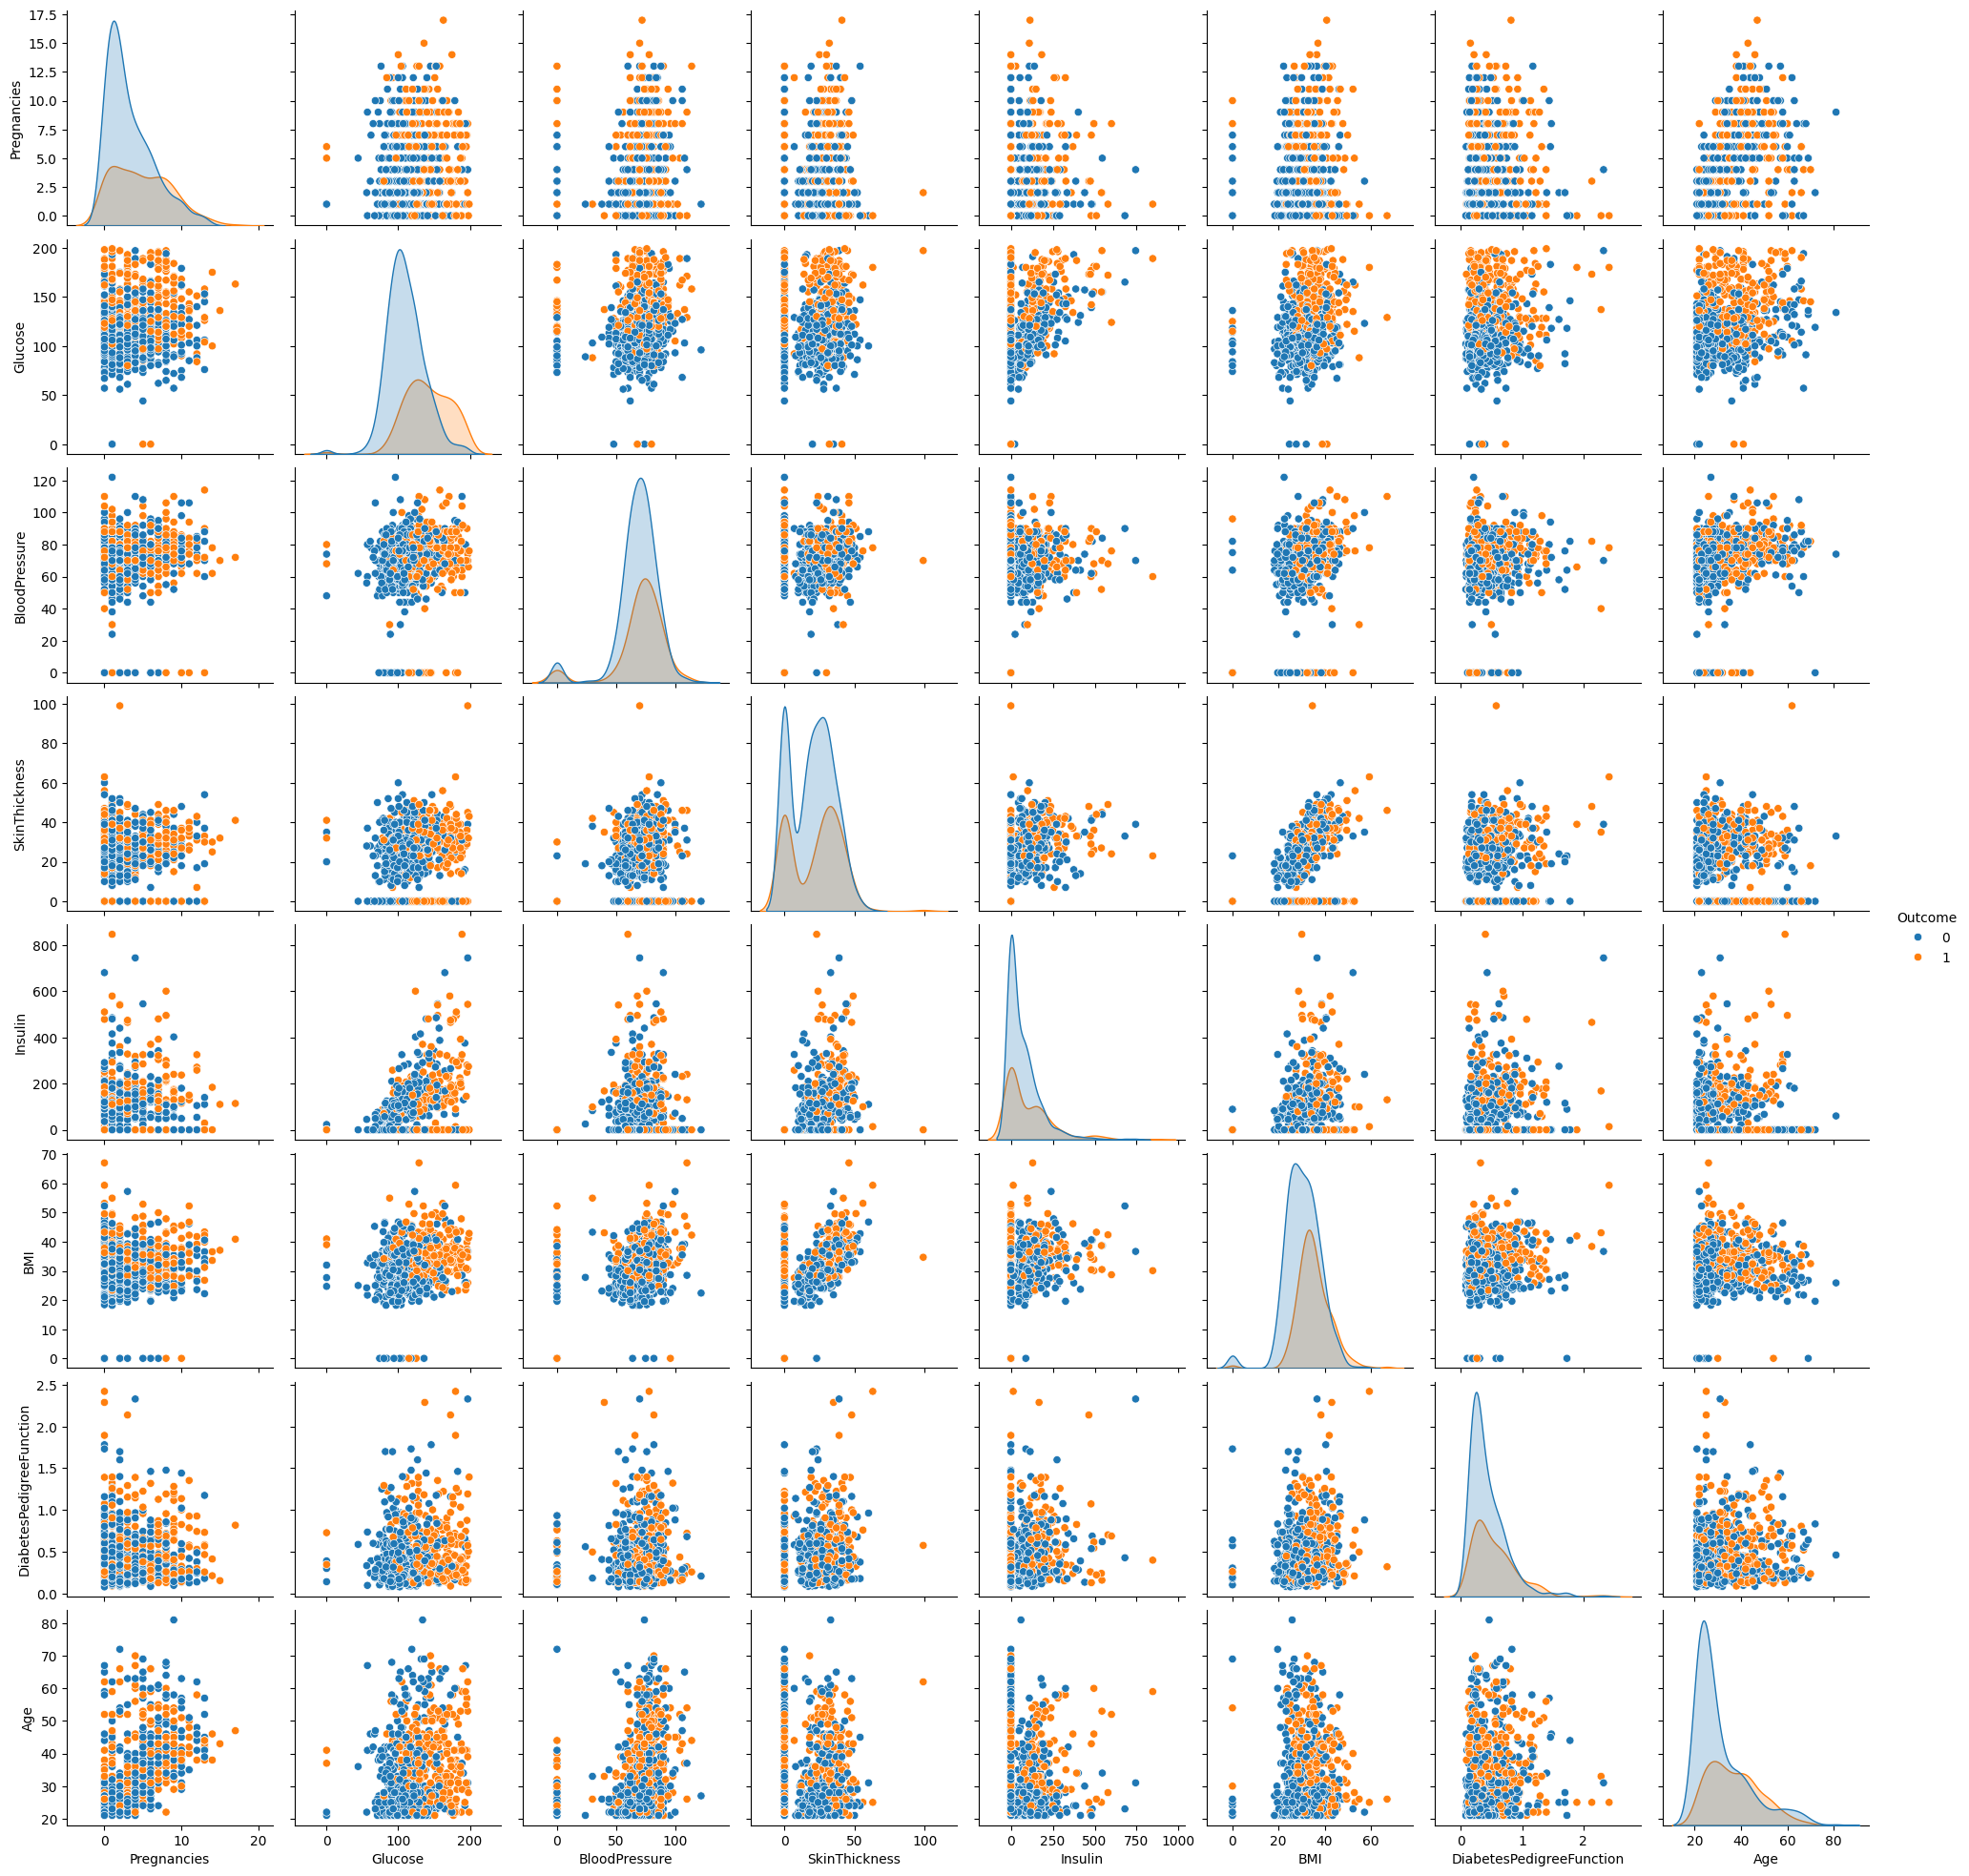

In [28]:
sns.pairplot(df, hue='Outcome')
plt.show()

Here, we will use Correlation Heatmap to analysis correlation between each features

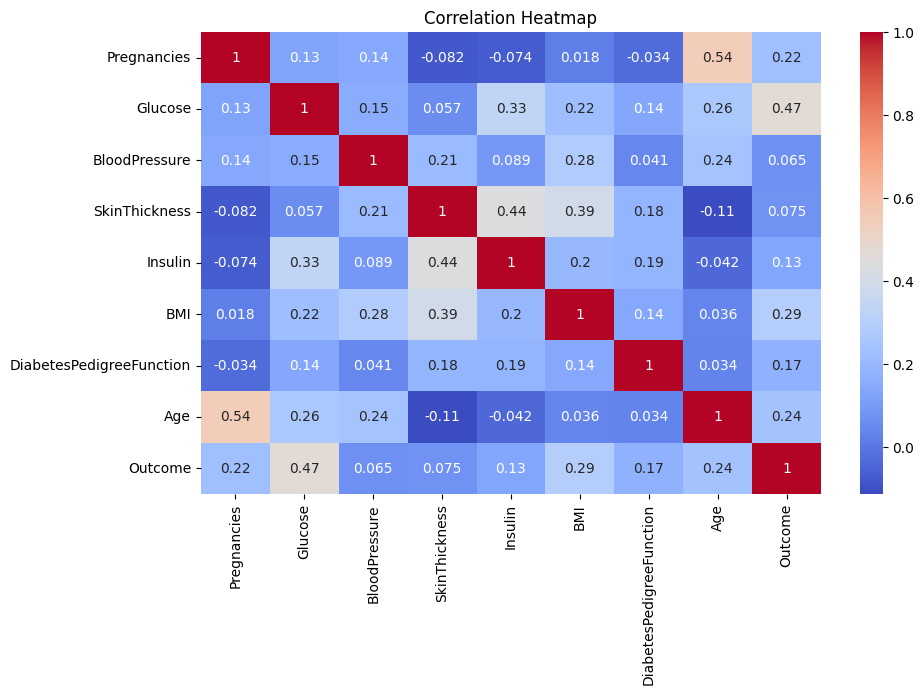

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Boxplots** to see feature distribution by outcome

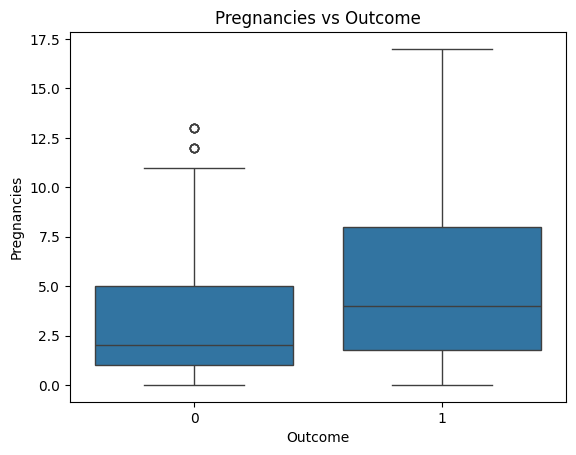

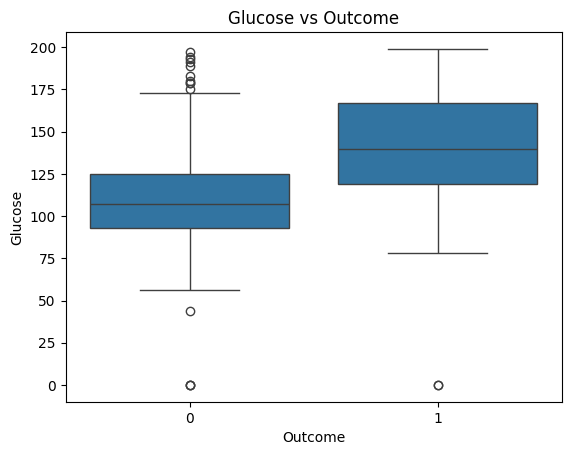

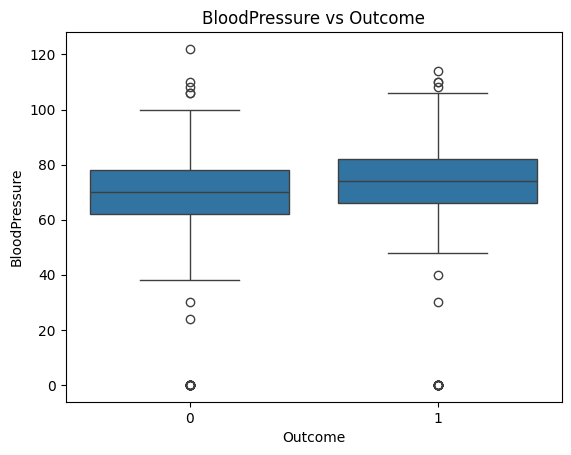

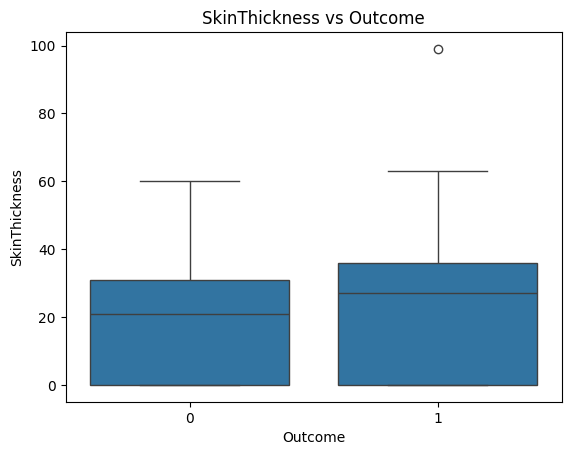

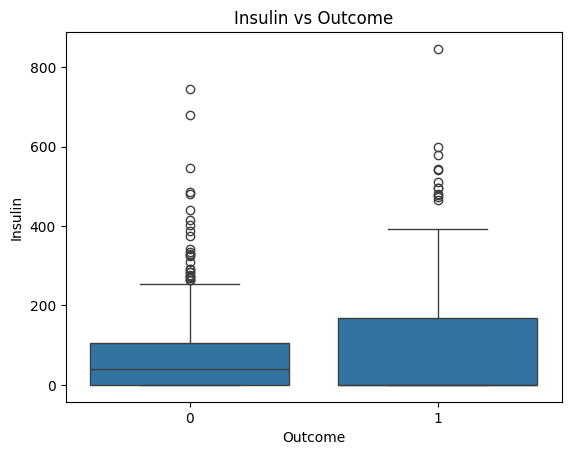

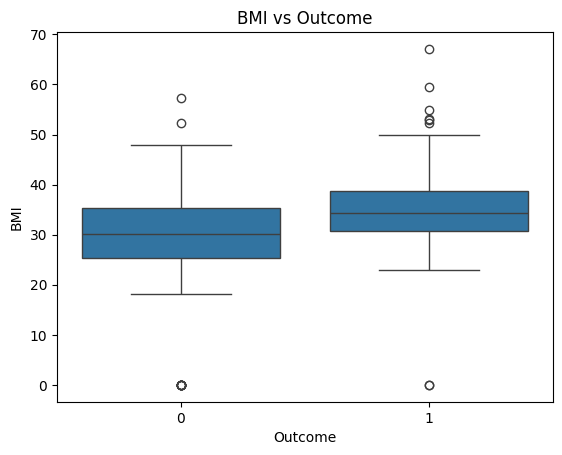

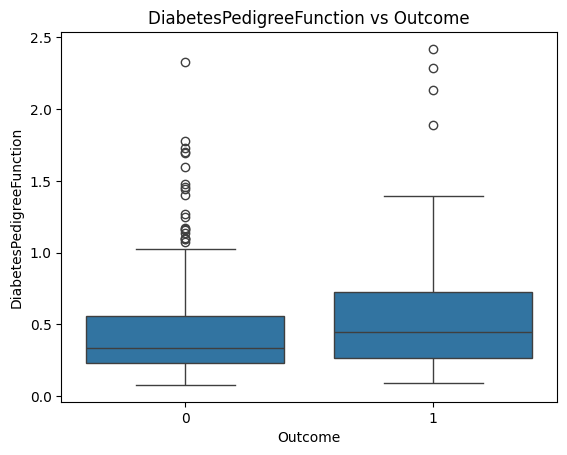

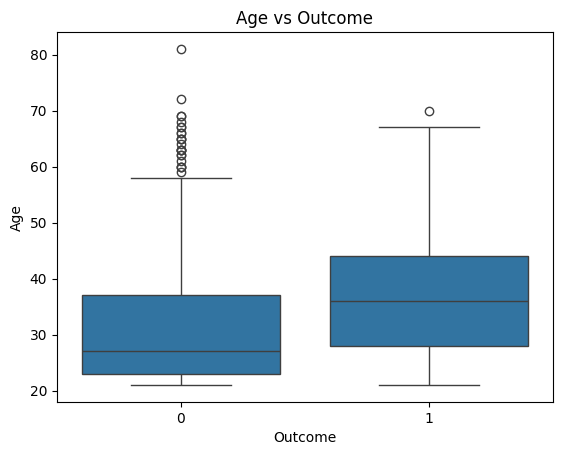

In [37]:
"""columns.delete(-1)
plt.figure( figsize= (10,12))
for i in range(len(columns)):
    plt.scatter(df[columns[i]],df[columns[j]],alpha = .8)
    plt.xlabel(columns[i])
    plt.ylabel(columns[j])
    plt.title(columns[i]+ " VS "+columns[j])
    plt.show()
    print("\n\n")"""

for feature in features:
    plt.figure()
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs Outcome')
    plt.show()





Now we'll divide features into dependent and independent features

In [41]:
X = df.drop("Outcome", axis =1)
y = df["Outcome"]

Splitting testing and training data

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3)

In [45]:
decisionT_gini = DecisionTreeClassifier()
decisionT_gini.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred_gini = decisionT_gini.predict(X_test)

In [47]:
print("Gini Index - Classification Report:\n", classification_report(y_test, y_pred_gini))

Gini Index - Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68       143
           1       0.48      0.48      0.48        88

    accuracy                           0.61       231
   macro avg       0.58      0.58      0.58       231
weighted avg       0.61      0.61      0.61       231



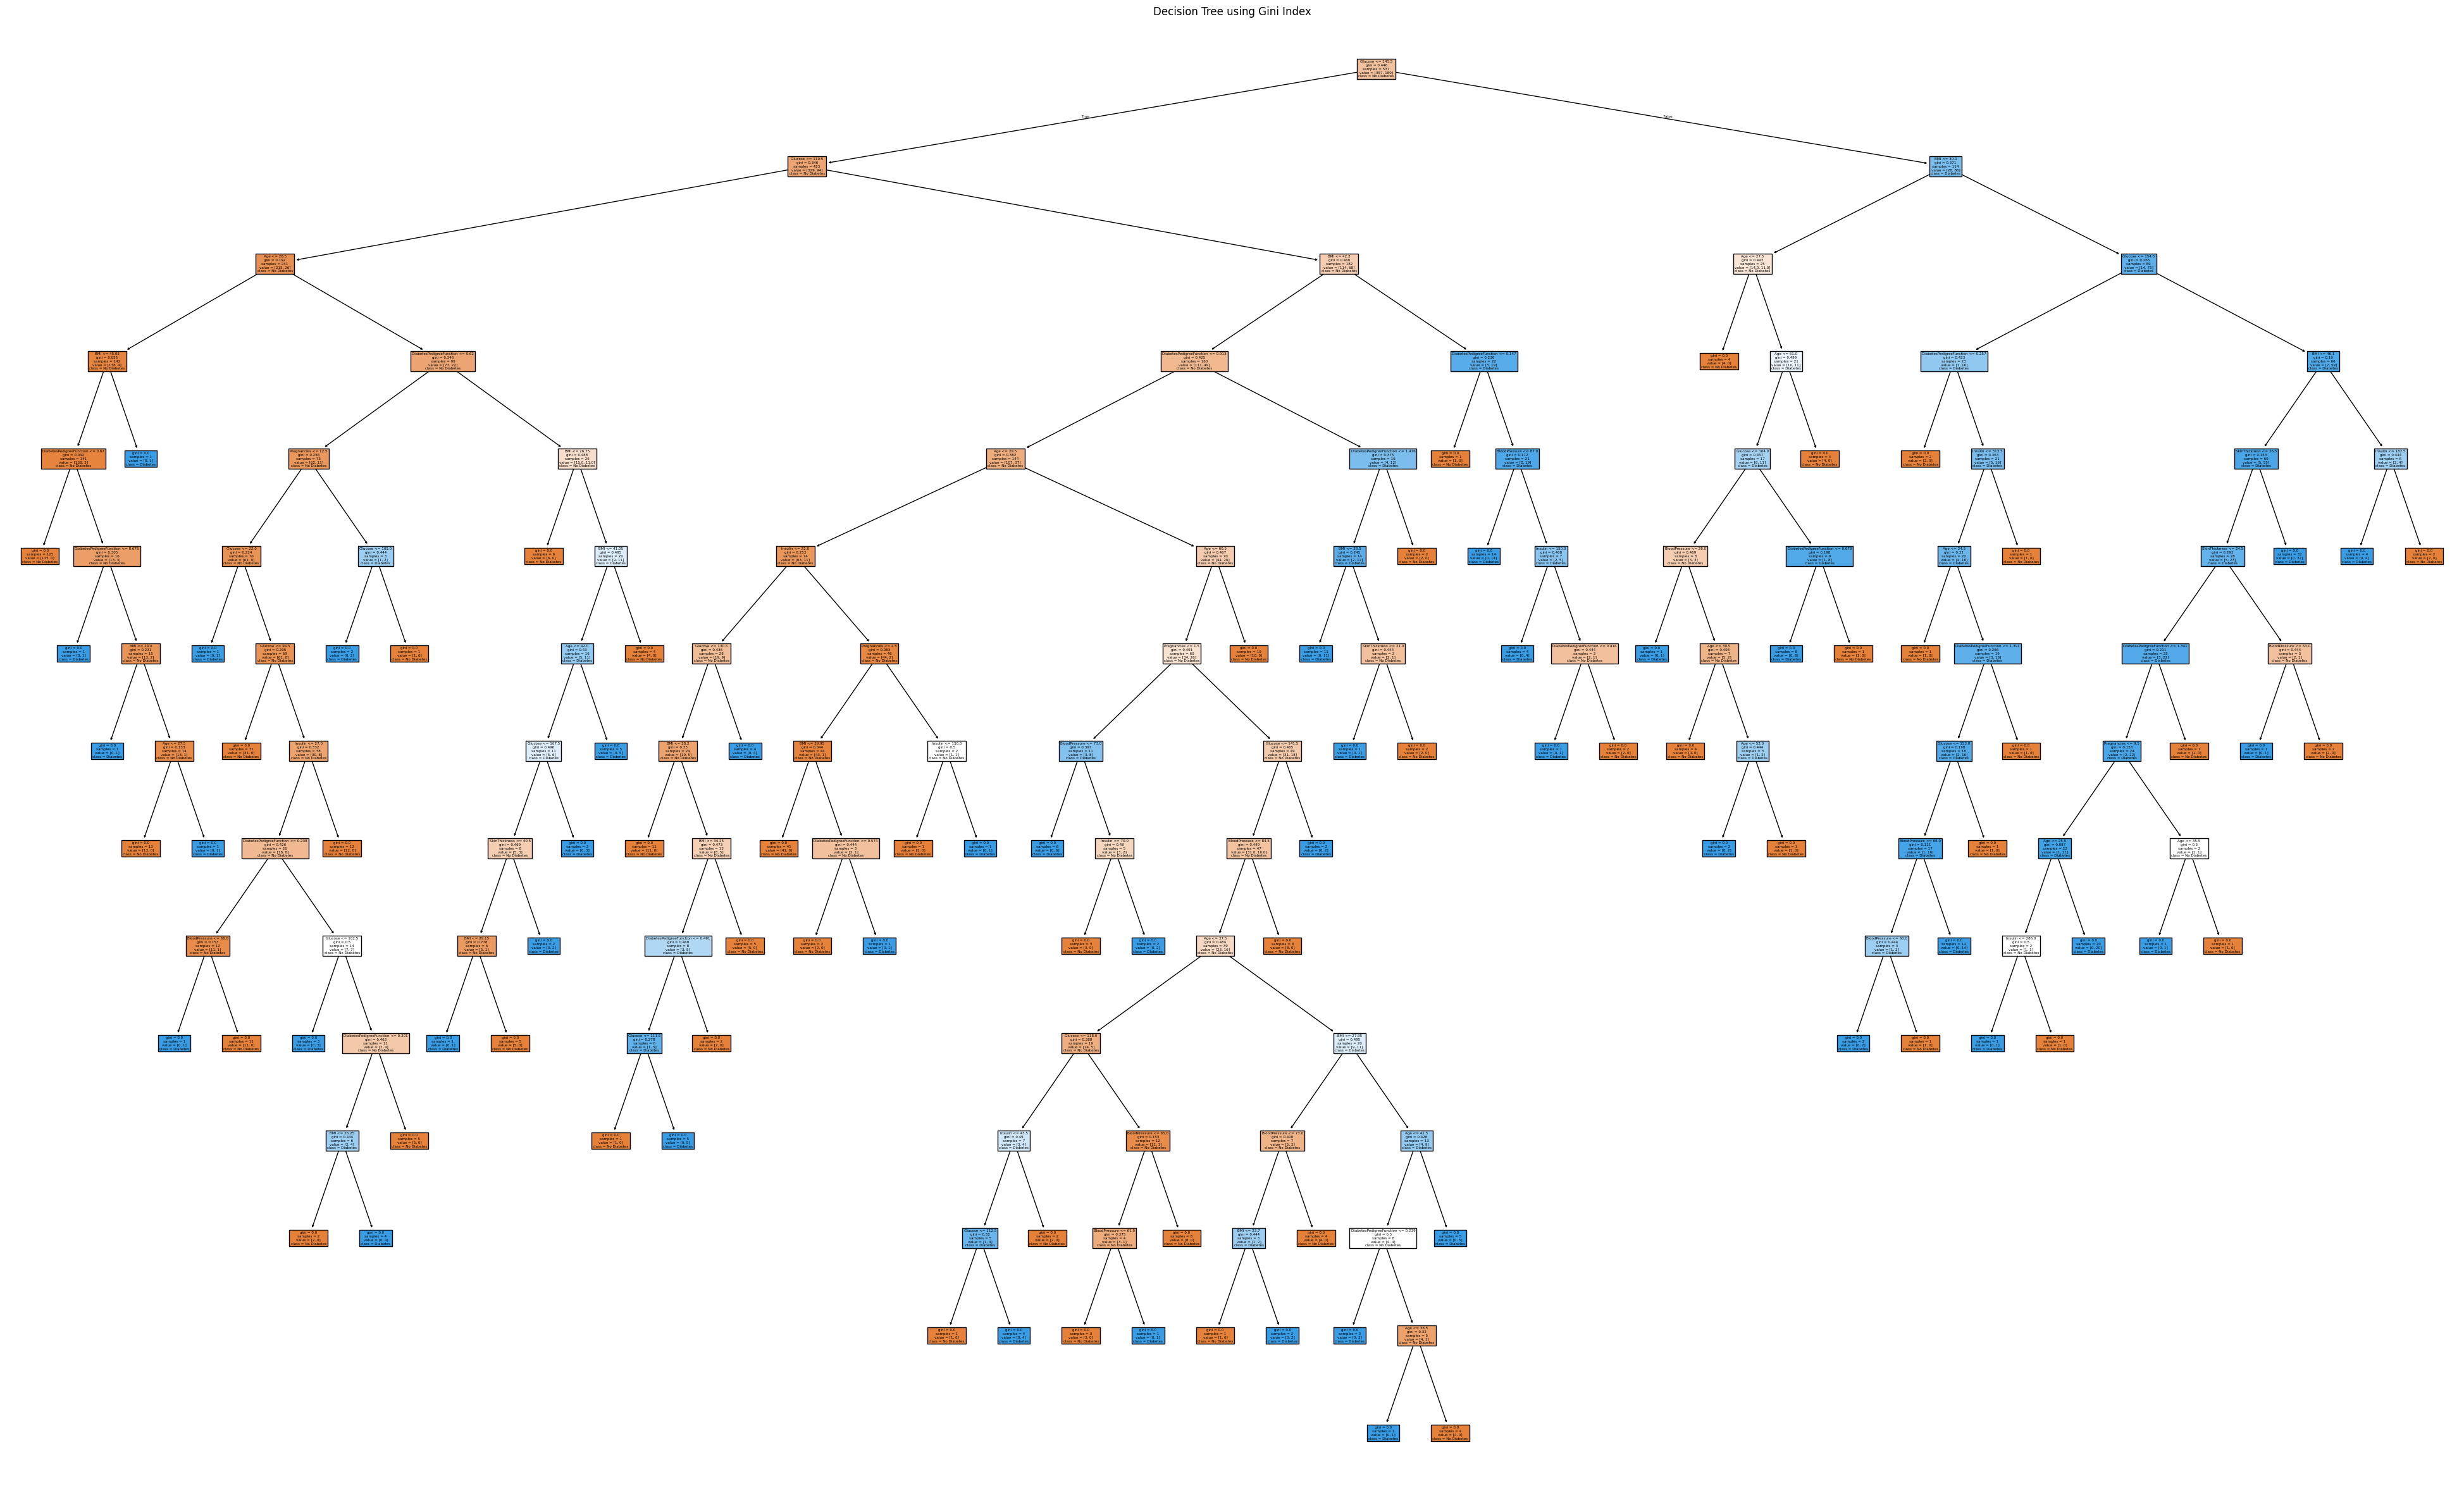

In [61]:
plt.figure(figsize=(50,30))
plot_tree(decisionT_gini, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree using Gini Index" )
plt.show()

In [70]:
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [71]:
y_pred_entropy = dt_entropy.predict(X_test)
print("Entropy - Classification Report:\n", classification_report(y_test, y_pred_entropy))


Entropy - Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       143
           1       0.51      0.45      0.48        88

    accuracy                           0.63       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.62      0.63      0.62       231



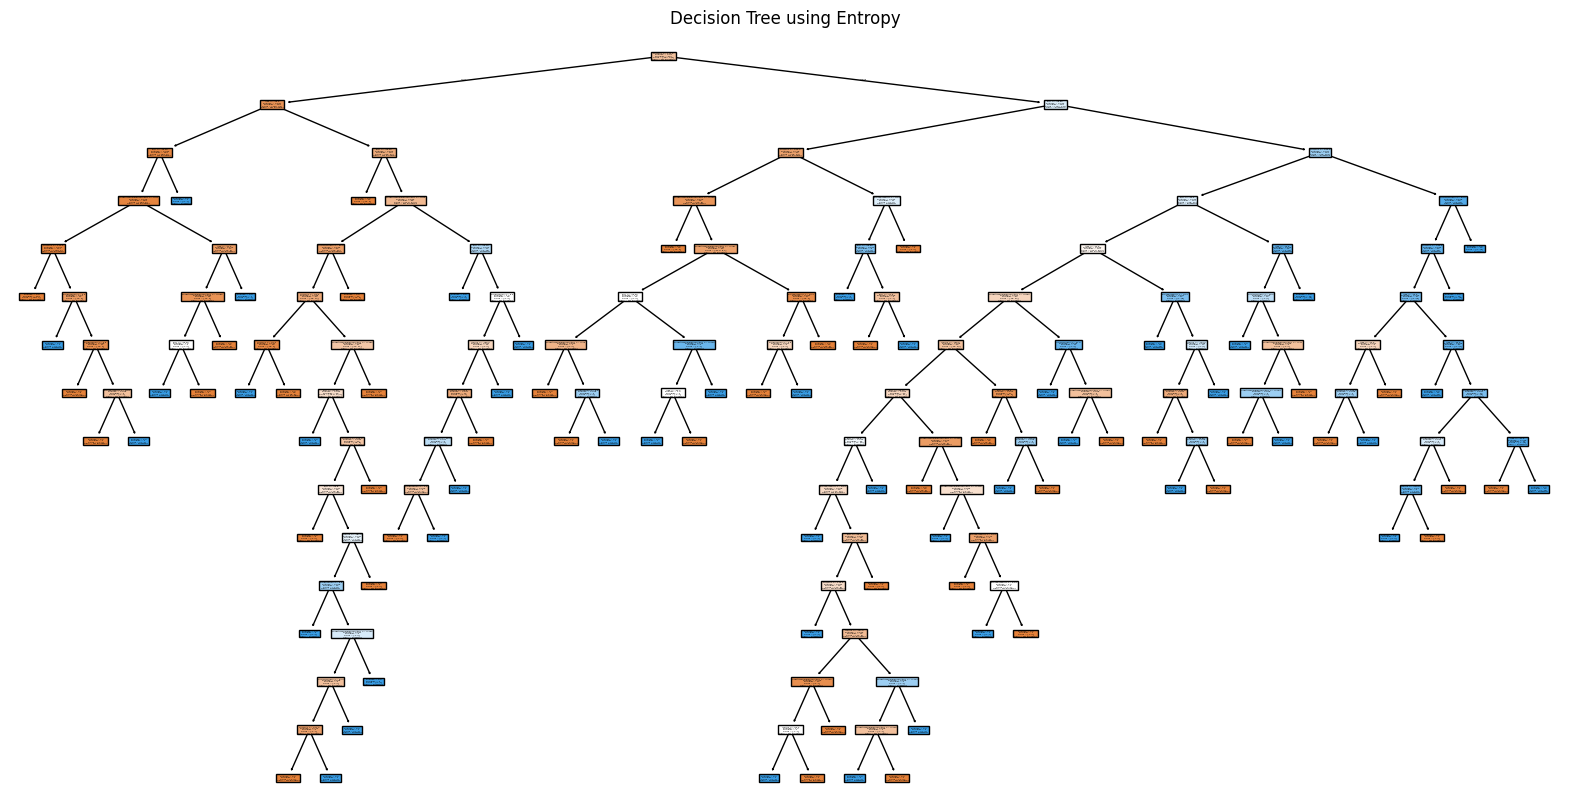

In [72]:
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree using Entropy")
plt.show()

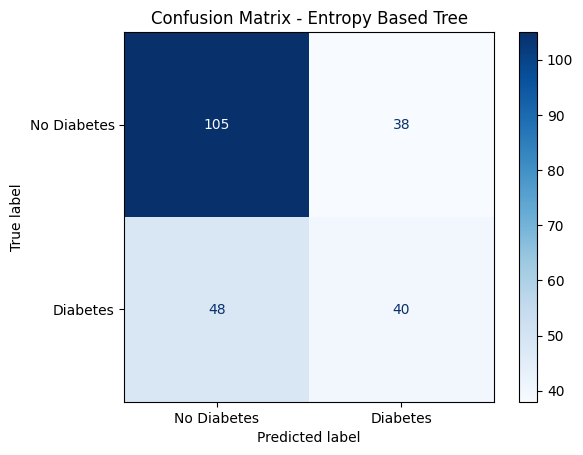

In [73]:
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Entropy Based Tree")
plt.show()

In [74]:
dt_cross_entropy = DecisionTreeClassifier(criterion='log_loss', random_state=42)
dt_cross_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

In [75]:
y_pred_cross_entropy = dt_cross_entropy.predict(X_test)
print("Entropy - Classification Report:\n", classification_report(y_test, y_pred_cross_entropy))

Entropy - Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       143
           1       0.53      0.48      0.50        88

    accuracy                           0.64       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.63      0.64      0.63       231



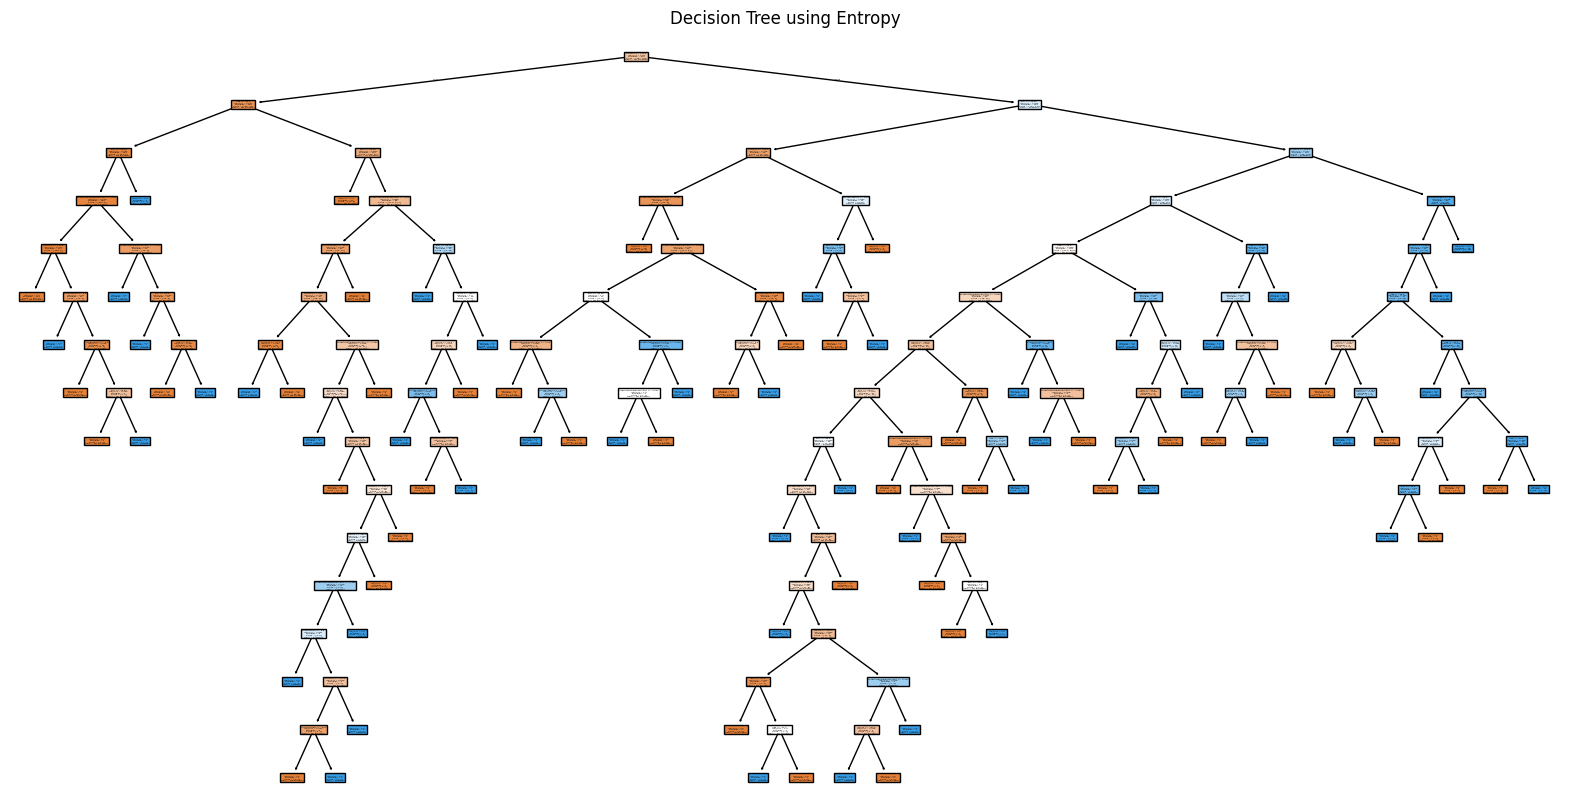

In [76]:
plt.figure(figsize=(20,10))
plot_tree(dt_cross_entropy, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree using Entropy")
plt.show()

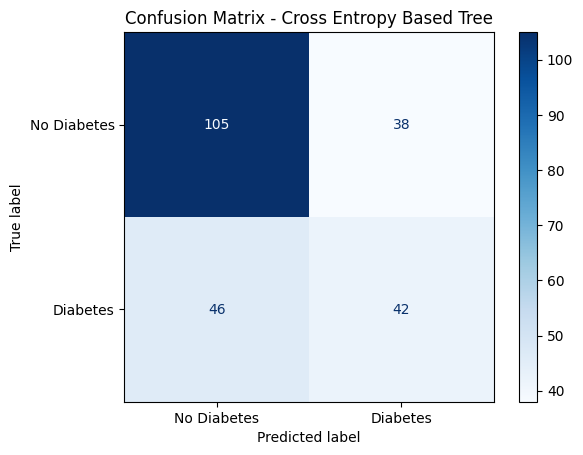

In [77]:
cm = confusion_matrix(y_test, y_pred_cross_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Cross Entropy Based Tree")
plt.show()